In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cases = ['ASD',
        'SZ',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

p_rand = './results/condition/random/'

# Load Data

In [13]:
# Single Task
st_data_conn = []
st_data_conf = []
for case in cases:
    folds_conn = []
    folds_conf = []
    for fold in range(5):
        # Connectomes
        p_parent = os.path.join(p_rand, f"connectomes/{case}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds_conn.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[case])

        # Confounds
        p_parent = os.path.join(p_rand, f"confounds/{case}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds_conf.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[case])
    st_data_conn.append(folds_conn)
    st_data_conf.append(folds_conf)

st_data_conn = dict(zip(cases,st_data_conn))
st_data_conf = dict(zip(cases,st_data_conf))

In [14]:
# Multi-task
mtl_data_conn = []
mtl_data_conf = []
for fold in range(5):
    # Connectomes
    p_parent = os.path.join(p_rand, f"connectomes/all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data_conn.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

    # Confounds
    p_parent = os.path.join(p_rand, f"confounds/all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data_conf.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


# Get Accuracy

In [15]:
# Single Task
st_acc_conn = []
st_acc_conf = []
st_acc_conn_var = []
st_acc_conf_var = []
for case in cases:
    # Connectomes
    vals = [st_data_conn[case][fold]['Accuracy/test'].iloc[-1] for fold in range(5)]
    st_acc_conn.append(np.mean(vals))
    st_acc_conn_var.append(np.var(vals))

    # Confounds
    vals = [st_data_conf[case][fold]['Accuracy/test'].iloc[-1] for fold in range(5)]
    st_acc_conf.append(np.mean(vals))
    st_acc_conf_var.append(np.var(vals))

st_acc_conn = pd.Series(st_acc_conn,index=cases)
st_acc_conf = pd.Series(st_acc_conf,index=cases)
st_acc_conn_var = pd.Series(st_acc_conn_var,index=cases)
st_acc_conf_var = pd.Series(st_acc_conf_var,index=cases)

In [17]:
# Multi-task
mtl_acc_conn = []
mtl_acc_conf = []
for fold in range(5):
    # Connectomes
    df = mtl_data_conn[fold].transpose().reset_index()
    df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
    mtl_acc_conn.append(df)

    # Confounds
    df = mtl_data_conf[fold].transpose().reset_index()
    df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
    mtl_acc_conf.append(df)
    
mtl_acc_conn_var = pd.concat(mtl_acc_conn,axis=1).var(axis=1)
mtl_acc_conf_var = pd.concat(mtl_acc_conf,axis=1).var(axis=1)
mtl_acc_conn = pd.concat(mtl_acc_conn,axis=1).mean(axis=1)
mtl_acc_conf = pd.concat(mtl_acc_conf,axis=1).mean(axis=1)

# Tables

In [18]:
# Connectomes
df_conn = pd.concat([st_acc_conn,mtl_acc_conn,st_acc_conn_var,mtl_acc_conn_var],axis=1)
df_conn.columns = ['ST','MTL','ST_var','MTL_var']
df_conn

,ST,MTL,ST_var,MTL_var
ASD,61.949153,62.203390,5.702384,5.601839
SZ,74.250000,76.750000,17.093750,9.062500
BIP,75.500000,82.000000,8.500000,38.750000
DEL22q11_2,78.181818,68.181818,19.834711,72.314050
DUP22q11_2,60.000000,60.000000,152.066116,24.793388
DEL16p11_2,70.000000,71.250000,100.000000,31.250000
DUP16p11_2,54.444444,57.777778,17.283951,24.691358
DEL1q21_1,64.615385,53.846154,203.550296,118.343195
DUP1q21_1,64.000000,60.000000,104.000000,400.000000


In [19]:
# Confounds
df_conf = pd.concat([st_acc_conf,mtl_acc_conf,st_acc_conf_var,mtl_acc_conf_var],axis=1)
df_conf.columns = ['ST','MTL','ST_var','MTL_var']
df_conf

,ST,MTL,ST_var,MTL_var
ASD,50.687831,51.440678,22.552560,8.312985
SZ,62.500000,61.250000,19.287109,20.117188
BIP,73.750000,77.000000,6.250000,10.625000
DEL22q11_2,58.888889,64.545455,81.481481,117.768595
DUP22q11_2,35.555556,40.000000,19.753086,190.082645
DEL16p11_2,56.923077,60.000000,203.550296,70.312500
DUP16p11_2,48.571429,43.333333,28.571429,52.469136
DEL1q21_1,54.000000,43.076923,64.000000,372.781065
DUP1q21_1,50.000000,32.000000,0.000000,170.000000


In [20]:
df_conf.mean()

ST          54.541865
MTL         52.516265
ST_var      49.493996
MTL_var    112.496568
dtype: float64

# Plots

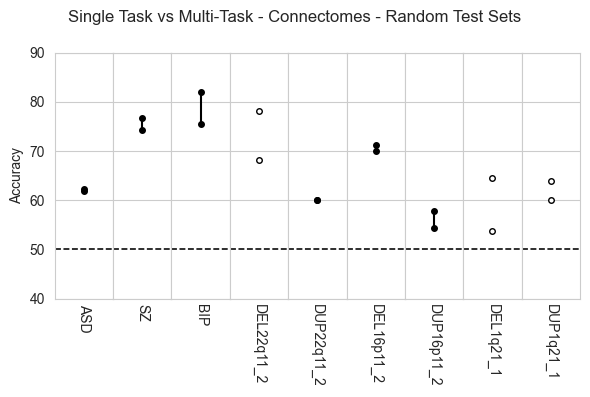

In [22]:
###############
# CONNECTOMES #
###############
title = 'Single Task vs Multi-Task - Connectomes - Random Test Sets'
fig,ax = plt.subplots(1,len(cases),figsize=(6,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = df_conn.loc[case]['ST']
    mtl_acc = df_conn.loc[case]['MTL']
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(cases[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(40,90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(p_rand,'connectomes/figures/st_vs_mtl.png'),dpi=300)